# Predicting heart disease using Machine Learning


**It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.**


We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition


In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).


This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.


The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease


Howevever, we've downloaded it in a formatted way from Kaggle.https://www.kaggle.com/ronitf/heart-disease-uci


The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.


## 3. Evaluation


The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.


## 4. Features

> This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
<hr/>
2. sex - (1 = male; 0 = female)
<hr/>
3. cp - chest pain type
 * Typical angina: chest pain related decrease blood supply to the heart
 * Atypical angina: chest pain not related to heart
 * Non-anginal pain: typically esophageal spasms (non heart related)
 * Asymptomatic: chest pain not showing signs of disease
<hr/>
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
<hr/>
5. chol - serum cholestoral in mg/dl
 * serum = LDL + HDL + .2 * triglycerides
 * above 200 is cause for concern
<hr/>
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 * '>126' mg/dL signals diabetes
<hr/>
7. restecg - resting electrocardiographic results
 * 0.Nothing to note
 * 1.ST-T Wave abnormality
     * can range from mild symptoms to severe problems
     * signals non-normal heart beat
 * 2.Possible or definite left ventricular hypertrophy
     * Enlarged heart's main pumping chamber
<hr/>
8. thalach - maximum heart rate achieved
<hr/>
9. exang - exercise induced angina (1 = yes; 0 = no)
<hr/>
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
<hr/>
11. slope - the slope of the peak exercise ST segment
 * 0: Upsloping: better heart rate with excercise (uncommon)
 * 1: Flatsloping: minimal change (typical healthy heart)
 * 2: Downslopins: signs of unhealthy heart
<hr/>
12. ca - number of major vessels (0-3) colored by flourosopy
 * colored vessel means the doctor can see the blood passing through
 * the more blood movement the better (no clots)
<hr/>
13. thal - thalium stress result
 * 1,3: normal
 * 6: fixed defect: used to be defect but ok now
 * 7: reversable defect: no proper blood movement when excercising
 <hr/>
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## 1.Preparing the tools

* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## 2.Load Data

There are many different kinds of ways to store data. The typical way of storing tabular data, data similar to what you'd see in an Excel file is in .csv format. .csv stands for comma seperated values.

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot.

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## 3.Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the head() function. Calling it on any dataframe will print the top 5 rows, tail() calls the bottom 5. We can also pass a number to them like head(10) to show the top 10 rows.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Since these two values are close to even, our target column can be considered balanced. An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.


We can plot the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good.

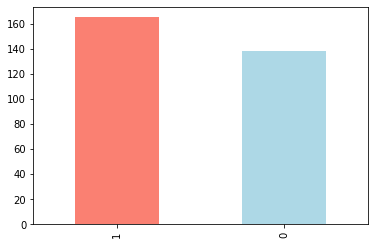

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

df.info() shows a quick insight to the number of missing values you have and what type of data your working with.

In our case, there are no missing values and all of our columns are numerical in nature.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:title={'center':'Finding Null Values Using Heatmap\n'}>

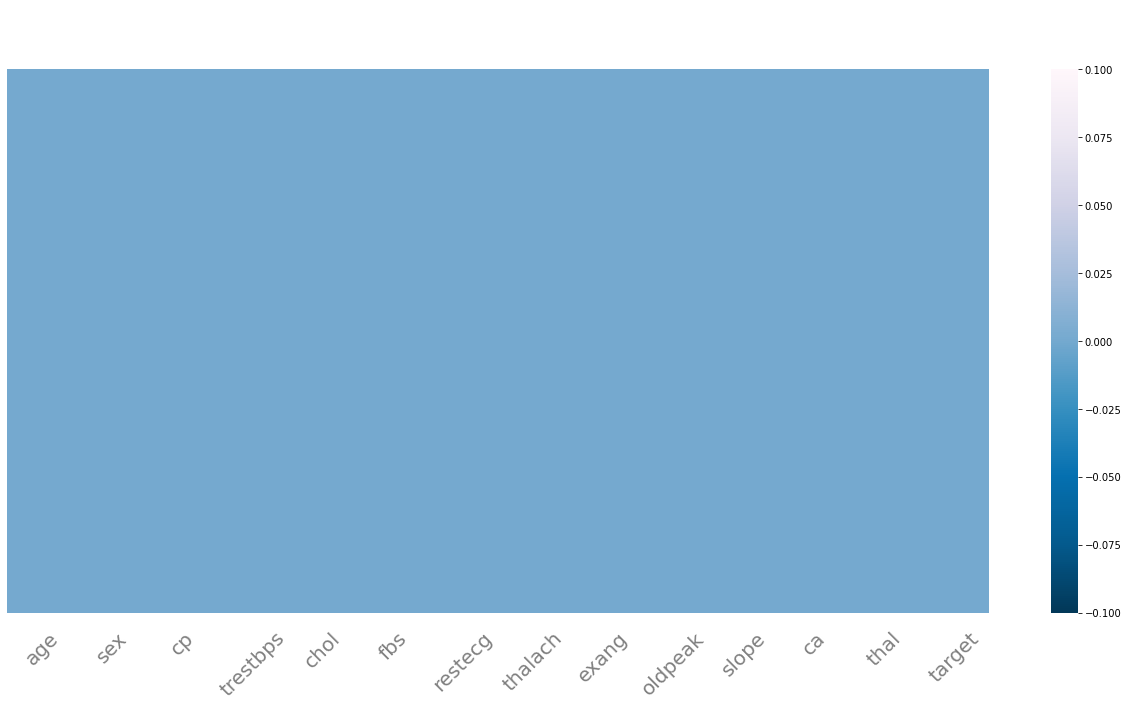

In [9]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey', rotation = 45)
plt.tick_params(size=12,color='white')

plt.title('Finding Null Values Using Heatmap\n', color='white',size=30)

sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='PuBu_r')

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(14.5, -0.5)

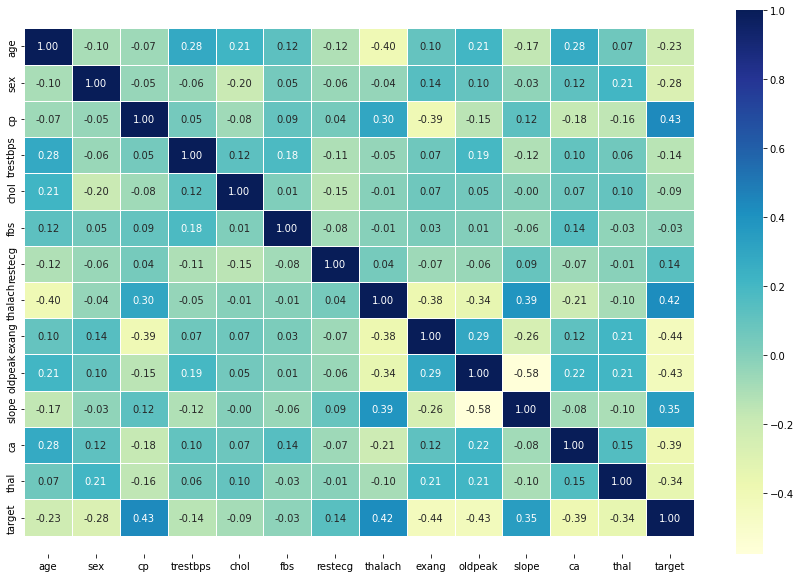

In [11]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 4.Data Visuvalization

In [12]:
# Creating a copy of original dataset
df2 = df.copy()

#### 4.1. Count plot

In [13]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'

# Applying the function for "Sex" column
df2['sex'] = df2['sex'].apply(chng)

In [14]:

def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'

# Applying the function for "Sex" column
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'

# Applying the function for Target function
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target')

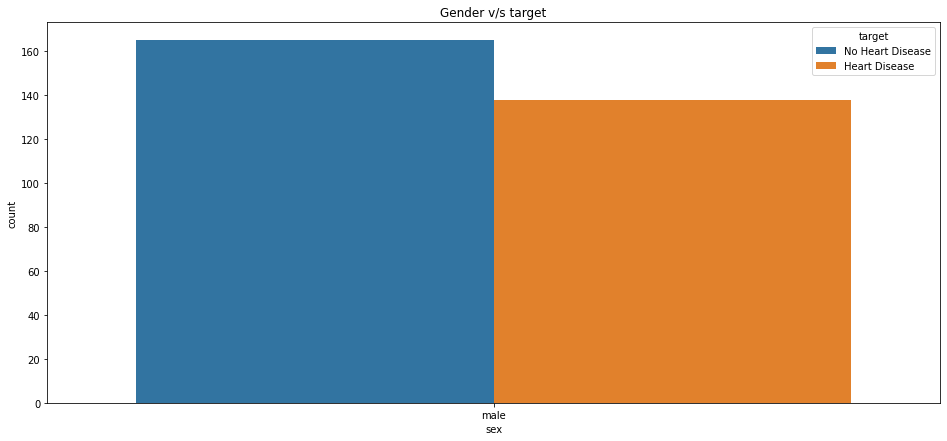

In [15]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='sex', hue='target')
plt.title('Gender v/s target')

Text(0.5, 1.0, 'Chest Pain Type v/s target')

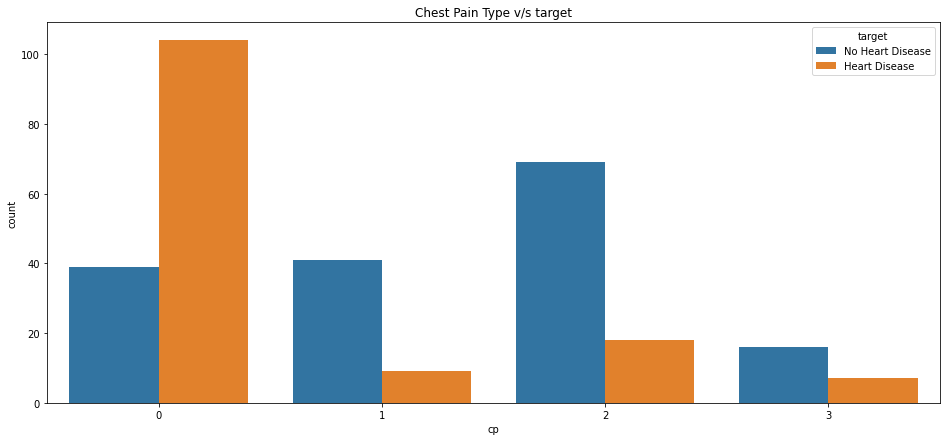

In [16]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='cp', hue='target')
plt.title('Chest Pain Type v/s target')

Text(0.5, 1.0, 'Gender v/s Thalassemia')

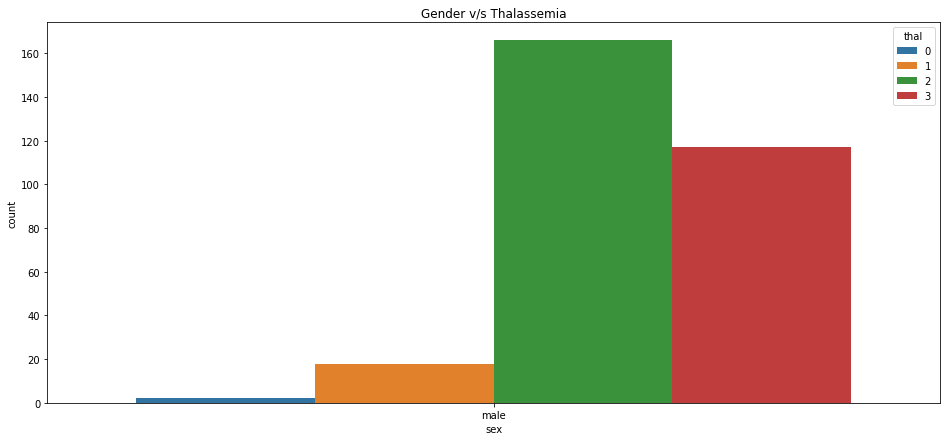

In [17]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia')

Text(0.5, 1.0, 'Slope v/s Target')

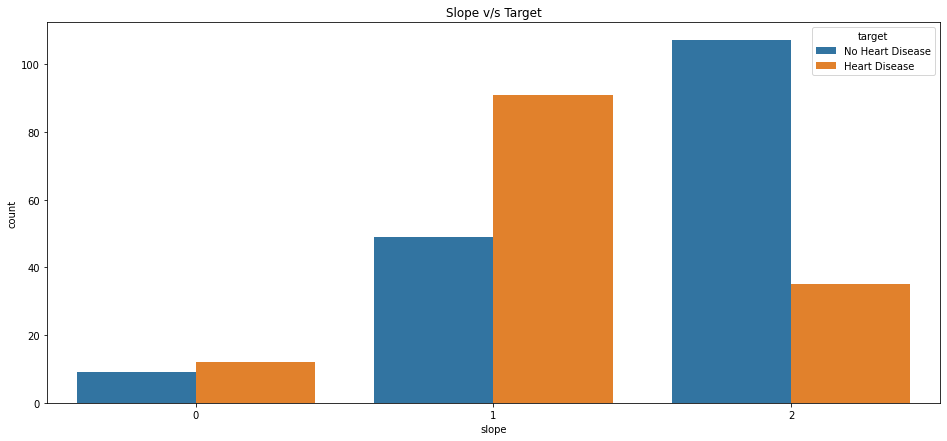

In [18]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target')

Text(0.5, 1.0, 'exang v/s Thalassemia')

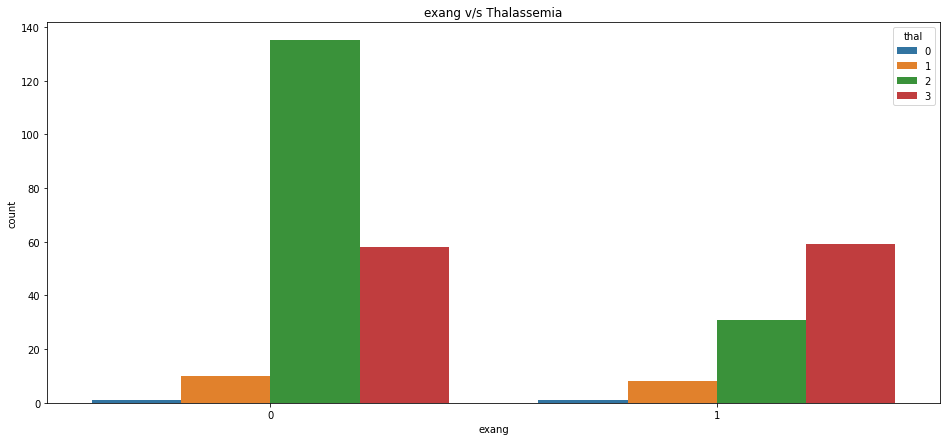

In [19]:
plt.figure(figsize=(16,7))
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia')

#### 4.2. Distplot


C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal Distribution of Age of Heart Diseased Patients')

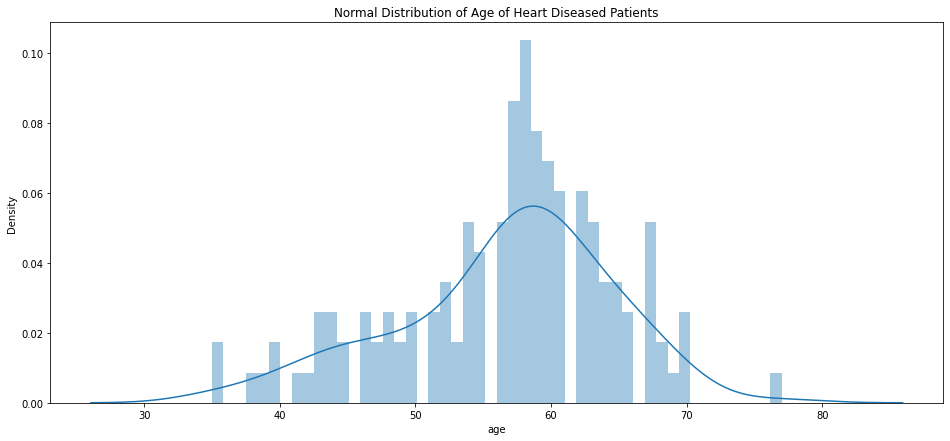

In [20]:
# Age of Patients having heart disease
age_tar_0 = df[df['target']==0]['age']

plt.figure(figsize=(16,7))
sns.distplot(age_tar_0, kde=True, bins=50)
plt.title('Normal Distribution of Age of Heart Diseased Patients')

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal Distribution for Chol of Heart Diseased Patients')

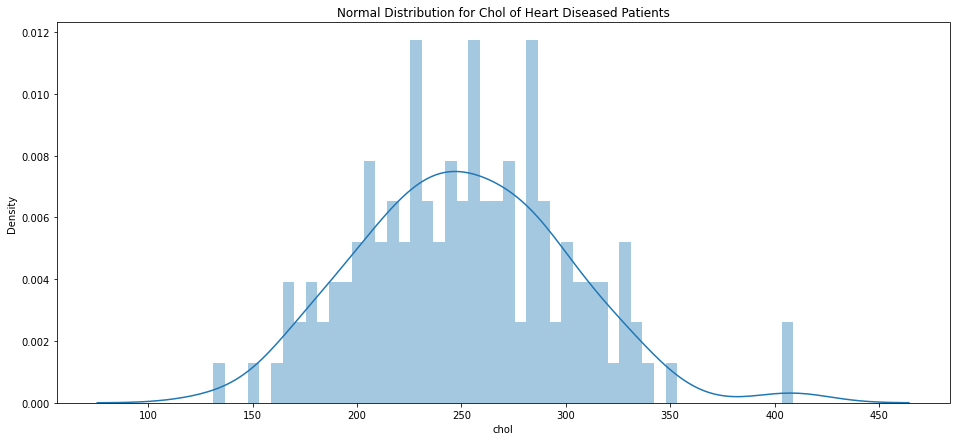

In [21]:
# Chol level for patients with heart disease
chol_tar_0 = df[df['target']==0]['chol']

# Chol level of the patients
plt.figure(figsize=(16,7))
sns.distplot(chol_tar_0, kde=True, bins=50)
plt.title('Normal Distribution for Chol of Heart Diseased Patients')

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'thalach of Heart Diseased Patients')

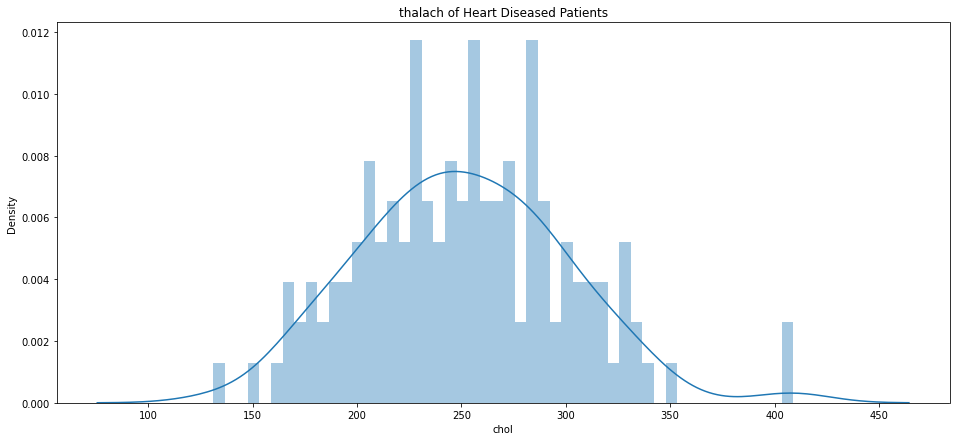

In [22]:
# Thalach level for patients with heart disease
Thalach_tar_0 = df[df['target']==0]['chol']
plt.figure(figsize=(16,7))
sns.distplot(Thalach_tar_0,kde=True, bins=50)
plt.title('thalach of Heart Diseased Patients')

#### 4.3. Jointplot


In [23]:
# Selecting all patients having heart disease
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] 
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


Age vs trestbps(Heart Diseased Patinets)


<Figure size 1440x720 with 0 Axes>

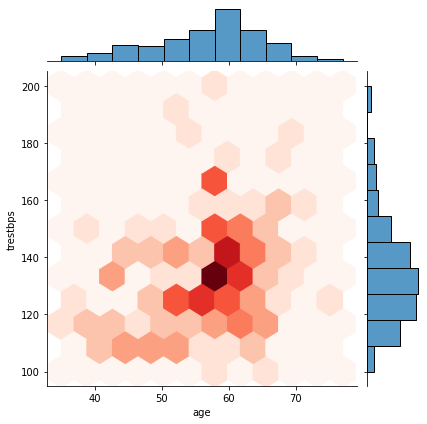

In [24]:
pal = sns.light_palette("blue", as_cmap=True)
plt.figure(figsize=(20,10))
print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3, x='age',  y='trestbps',  kind='hex',  cmap='Reds')
plt.show()

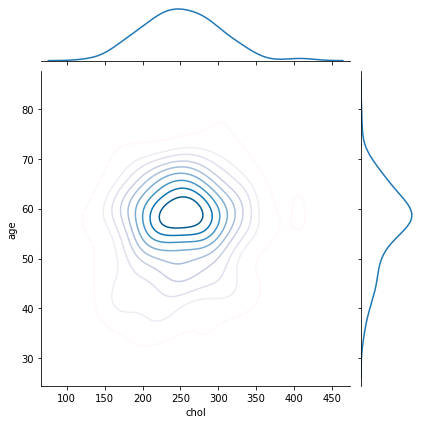

In [25]:
sns.jointplot(data=df3, x='chol', y='age', kind='kde', cmap='PuBu')


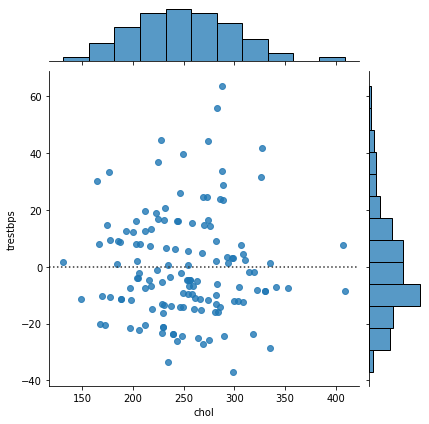

In [26]:
sns.jointplot(data=df3, x='chol',  y='trestbps',  kind='resid')


#### 4.4. Boxplot


<AxesSubplot:xlabel='target', ylabel='age'>

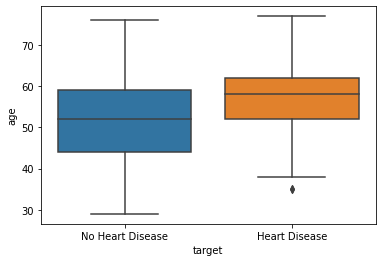

In [27]:
sns.boxplot(data=df2,x='target',y='age')


<AxesSubplot:xlabel='cp', ylabel='thalach'>

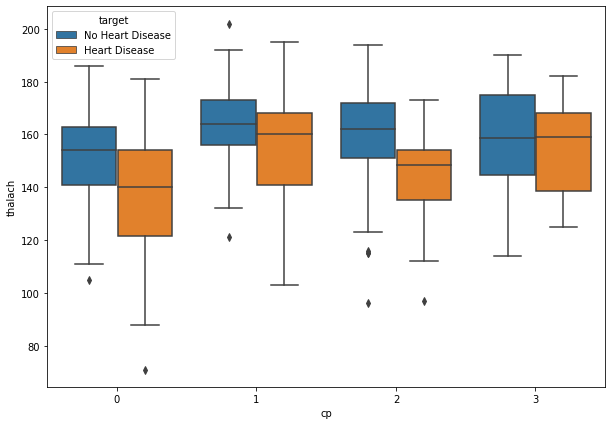

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='cp',y='thalach',hue='target')

<AxesSubplot:xlabel='fbs', ylabel='trestbps'>

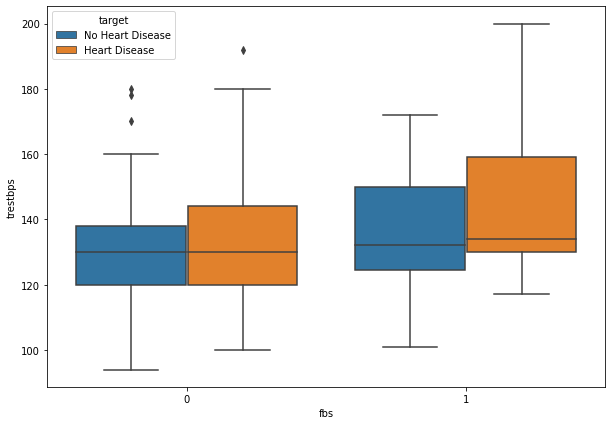

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trestbps',hue='target')

<AxesSubplot:xlabel='slope', ylabel='thalach'>

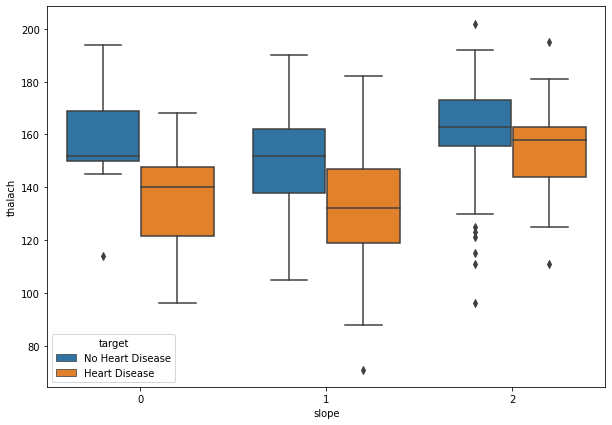

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target')

## 5. Data Pre-processing


### 5.1 Change Name of the column


In [31]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
              'rest_ecg_type', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope_type', 
              'num_major_vessels', 'thalassemia_type', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

For the given dataset, we have 4 Categorical Variables and rest are Numerical Values

cp - chest_pain_type
restecg - rest_ecg_type
slope - st_slope_type
thal - thalassemia_type

In [32]:
# Unique values in categorical values
list = []
cols = ['chest_pain_type', 'rest_ecg_type', 'st_slope_type', 'thalassemia_type']
for i in cols:
    uniq_val_cat = len(df[i].unique())
    print("Column:",i)
    print(df[i].unique())
    list.append(uniq_val_cat)

# Printing unique values for the selected columns
df_uni_val_cat = pd.DataFrame({'columns': cols, 'unique_values': list})
df_uni_val_cat

Column: chest_pain_type
[3 2 1 0]
Column: rest_ecg_type
[0 1 2]
Column: st_slope_type
[0 2 1]
Column: thalassemia_type
[1 2 3 0]


,columns,unique_values
0,chest_pain_type,4
1,rest_ecg_type,3
2,st_slope_type,3
3,thalassemia_type,4


#### Converting Numerical Values to Categorical Values


In [33]:
df_prep = df.copy()
df_prep.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
# cp - chest_pain_type
df_prep.loc[df_prep['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df_prep.loc[df_prep['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df_prep.loc[df_prep['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df_prep.loc[df_prep['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

# restecg - rest_ecg_type
df_prep.loc[df_prep['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df_prep.loc[df_prep['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df_prep.loc[df_prep['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

# slope - st_slope_type
df_prep.loc[df_prep['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df_prep.loc[df_prep['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df_prep.loc[df_prep['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

# thal - thalassemia_type
df_prep.loc[df_prep['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df_prep.loc[df_prep['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df_prep.loc[df_prep['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df_prep.loc[df_prep['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'

### 5.2 One Hot Encoding


In [35]:
data = pd.get_dummies(df_prep, drop_first=False)
data.head(10)

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,1,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,1,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,1,0,0
5,57,1,140,192,0,148,0,0.4,0,1,...,0,0,1,0,1,0,1,0,0,0
6,56,0,140,294,0,153,0,1.3,0,1,...,0,1,0,0,1,0,0,1,0,0
7,44,1,120,263,0,173,0,0.0,0,1,...,0,0,1,0,0,1,0,0,0,1
8,52,1,172,199,1,162,0,0.5,0,1,...,0,0,1,0,0,1,0,0,0,1
9,57,1,150,168,0,174,0,1.6,0,1,...,0,0,1,0,0,1,0,1,0,0


In [36]:
df_temp = data['thalassemia_type_fixed defect']
df_temp

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    0
301    0
302    0
Name: thalassemia_type_fixed defect, Length: 303, dtype: uint8

Since one hot encoding dropped "thalassemia_type_fixed defect" column which was a useful column compared to 'thalassemia_type_nothing' which is a null column, we dropped 'thalassemia_type_nothing' and concatinated 'thalassemia_type_fixed defect'

In [37]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,1,0,0,1,0,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,1,0,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,1,0,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,1,0,1,0,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,1,0,1,0,0,0


In [38]:
result.drop('thalassemia_type_nothing', axis=1, inplace=True)
resultc = result.copy()
resultc.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,1,0,0,1,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,1,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,1,0,0


## 6. Modelling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [39]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

In [40]:
# Split data into X and y
X = resultc.drop("target", axis=1)

y = resultc["target"]

In [82]:
X.head()


,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,chest_pain_type_asymptomatic,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,63,1,145,233,1,150,0,2.3,0,0,...,0,1,0,1,0,0,1,0,0,1
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,0,...,0,1,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,0,1,0,0,1,0,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,1,0,0


### 6.1.Training and test split

Now comes one of the most important concepts in machine learning, the training/test split.

This is where we'll split your data into a training set and a test set.

We use our training set to train our model and our test set to test it.

The test set must remain separate from our training set.

Why not use all the data to train a model?
Let's say you wanted to take your model into the hospital and start using it on patients. How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's train_test_split() and feed it our independent and dependent variables (X & y).

In [43]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [44]:
X_train

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,chest_pain_type_asymptomatic,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
132,42,1,120,295,0,162,0,0.0,0,0,...,0,0,1,0,0,1,0,1,0,0
202,58,1,150,270,0,111,1,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
196,46,1,150,231,0,147,0,3.6,0,0,...,0,0,1,0,1,0,0,1,0,0
75,55,0,135,250,0,161,0,1.4,0,0,...,0,1,0,0,1,0,0,1,0,0
176,60,1,117,230,1,160,1,1.4,2,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,140,233,0,163,0,0.6,1,0,...,0,0,1,0,1,0,0,0,1,0
71,51,1,94,227,0,154,1,0.0,1,0,...,0,0,1,0,0,1,0,0,1,0
106,69,1,160,234,1,131,0,0.1,1,0,...,0,1,0,0,1,0,0,1,0,0
270,46,1,120,249,0,144,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0


### 6.2.Model choices

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 4 different machine learning models:

 * Logistic Regression
 * K-Nearest Neighbours Classifier
 * Random Forest Classifier
 * Decision tree Classifier

In [46]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [47]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8688524590163934,
 'Decision Tree': 0.819672131147541}

### 6.3.Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

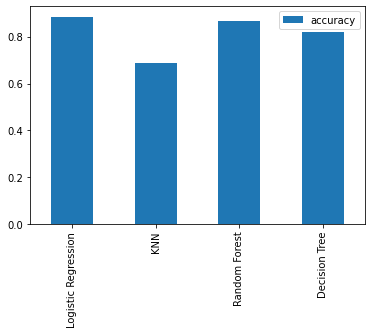

In [48]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

 * Hypyterparameter tuning
 * Feature importance
 * Confusion matrix
 * Cross-validation
 * Precision
 * Recall
 * F1 score
 * Classification report
 * ROC curve
 * Area under the curve (AUC)

### 6.4. Hyperparameter tuning (by hand)

In [49]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


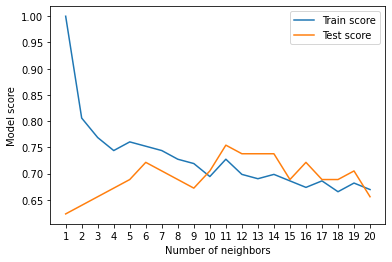

In [52]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### 6.5.Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

 * LogisticRegression()
 * RandomForestClassifier()
 
 
... using RandomizedSearchCV

In [53]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [54]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [55]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [56]:
rs_log_reg.score(X_test, y_test)

0.9016393442622951

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [57]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [58]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [59]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8852459016393442

### 6.6.Hyperparamter Tuning with GridSearchCV


Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [60]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [61]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [62]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.9016393442622951

### 6.7.Evaluting our tuned machine learning classifier, beyond accuracy
 * ROC curve and AUC score
 * Confusion matrix
 * Classification report
 * Precision
 * Recall
 * F1-score

... and it would be great if cross-validation was used where possible.


To make comparisons and evaluate our trained model, first we need to make predictions.

In [63]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

C:\Users\1002737\.conda\envs\tfgpu241\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


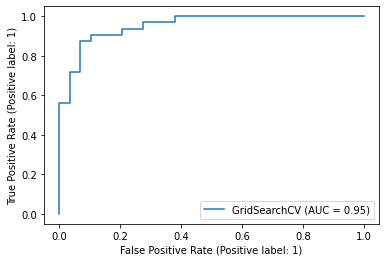

In [66]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [67]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[27  2]
 [ 4 28]]


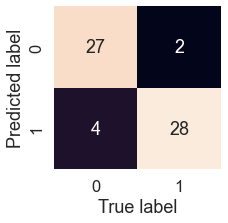

In [68]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom, top)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



What's going on here?

Let's get a refresh.

 * Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
 * Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
 * F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
 * Support - The number of samples each metric was calculated on.
 * Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
 * Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
 * Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

### 6.8 Calculate evaluation metrics using cross-validation


We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [70]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [72]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.83606557, 0.90163934, 0.80327869, 0.85      , 0.78333333])

In [73]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8348633879781422

In [74]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8339445016864373

In [75]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8727272727272727

In [76]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8519786373047241

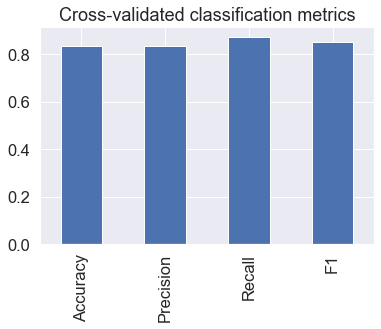

In [77]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

**Great! This looks like something we could share. An extension might be adding the metrics on top of each bar so someone can quickly tell what they were.**

What now?

The final thing to check off the list of our model evaluation techniques is feature importance.

According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.


This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.


Is this true?


When you look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

                               
What can you do with this information?

                               
This is something you might want to talk to a subject matter expert about. They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

                               
Doing this has a few benefits:

                               
1. Finding out more - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
2. Redirecting efforts - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
3. Less but better - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

                               
## Experimentation
                               
Well we've completed all the metrics.
                               
But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

What next?
You might be wondering, what happens when the evaluation metric doesn't get hit?

Is everything we've done wasted?

No.

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of LogisticRegression) along with our specific data set doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

A good next step would be to discuss with your team or research on your own different options of going forward.

Could you collect more data?

Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.

Could you improve the current models (beyond what we've done so far)?

If your model is good enough, how would you export it and share it with others? (Hint: check out Scikit-Learn's documentation on model persistance)
The key here is to remember, your biggest restriction will be time. Hence, why it's paramount to minimise your times between experiments.

The more you try, the more you figure out what doesn't work, the more you'll start to get a hang of what does.